# California House Price Prediction

## <u> Introduction</u>
<p>Living in decent, affordable, and reasonably located housing is one of the most important determinants of well–being for every Californian. More than just basic shelter, housing affects our lives in other important ways, determining our access to work, education, recreation, and shopping. The cost and availability of housing also matters for the state’s economy, affecting the ability of businesses and other employers to hire and retain qualified workers and influencing their decisions about whether to locate, expand, or remain in California.</p>

In [1]:
import ipywidgets as widgets
import IPython.display as display
## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img1 = open('C:/Users/ruben/OneDrive/Pictures/Screenshots/house_california.jpg', 'rb').read()
img2 = open('C:/Users/ruben/OneDrive/Pictures/Screenshots/house_california2.jpg', 'rb').read()
## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi1 = widgets.Image(value=img1, format='png', width=450, height=400)
wi2 = widgets.Image(value=img2, format='png', width=450, height=400)
## Side by side thanks to HBox widgets
sidebyside = widgets.HBox([wi1, wi2])
## Finally, show.
display.display(sidebyside)

Unfortunately, housing in California is extremely expensive. Many households struggle to find housing that is affordable and meets their needs. Amid this challenge, many households make serious trade–offs in order to live here. Because of the important role housing plays in the lives of Californians, the state’s high housing costs are a major ongoing concern for state and local policy makers.

## <u>Problem Objective</u>
<p>The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.</p>

## <u>Data Overview</u>
<p>The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.
*Dataset*
    
| Field      | Description |
| ---- ------- | ----------- |
| longitude | (signed numeric - float) : Longitude value for the block in California, USA |
| latitude  | (numeric - float ) : Latitude value for the block in California, USA |
| housing_median_age | (numeric - int ) : Median age of the house in the block |
| total_rooms | (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_bedrooms | (numeric - float ) : Count of the total number of bedrooms in all houses in the block |
| population | (numeric - int ) : Count of the total number of population in the block |
| households | (numeric - int ) : Count of the total number of households in the block |
| median_income	| (numeric - float ) : Median of the total household income of all the houses in the block |
| ocean_proximity | (numeric - categorical ) : Type of the landscape of the block [NEAR BAY,1H OCEAN,INLAND,NEAR OCEAN,ISLAND] |
| median_house_value | (numeric - int ) : Median of the household prices of all the houses in the block |


## <u>Preliminary Tasks</u>
Let us load the required datasets and libraries needed to be used in the data science process

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from branca.element import Figure
import seaborn as sns
from folium.plugins import HeatMap
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
#Import the warnings 
import warnings
warnings.simplefilter("ignore")

In [4]:
#Import the dataset
cali_df = pd.read_excel("C:/Users/ruben/OneDrive/Documents/Python_DS/Datasets/housing_prices.xlsx")
cali_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## <u>Exploratory Data Analysis (EDA)</u>
Now that we have imported the relevant libraries and the dataset **`cali_df`**, let us perform some analytical tasks with the help of some insightful data visualizations.

In [5]:
#Find the structure of the data
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
#Finding the statistical info from the dataframe
cali_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#Finding the number of missing values
cali_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Here we observe that there are a total of 207 missing values from the total_bedrooms

In [8]:
cali_df[cali_df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


In [9]:
# Creating Basemap
fig1=Figure(width=550,height=350)
m1=folium.Map(location=[35.631861,-119.569704],tiles='stamenterrain',zoom_start=5)
fig1.add_child(m1)

for lat,long in zip(cali_df[cali_df['total_bedrooms'].isna()].latitude,cali_df[cali_df['total_bedrooms'].isna()].longitude):
    folium.Marker(location=[lat,long],popup='<h3 style="color:red;">No bedrooms</h3>',tooltip='Click here to see Popup').add_to(m1)
m1

In [10]:
cali_df[cali_df['total_bedrooms'].isna()][cali_df['ocean_proximity']=='ISLAND'].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


It can be seen that all the houses which are there on an island have bedrooms.

In [11]:
cali_df[cali_df['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8314,-118.32,33.35,27,1675,521.0,744,331,2.1579,ISLAND,450000
8315,-118.33,33.34,52,2359,591.0,1100,431,2.8333,ISLAND,414700
8316,-118.32,33.33,52,2127,512.0,733,288,3.3906,ISLAND,300000
8317,-118.32,33.34,52,996,264.0,341,160,2.7361,ISLAND,450000
8318,-118.48,33.43,29,716,214.0,422,173,2.6042,ISLAND,287500


In [12]:
# Creating Basemap
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[33.34,-118.33],tiles='stamenterrain',zoom_start=8)
fig2.add_child(m2)

for lat,long,index in zip(cali_df[cali_df['ocean_proximity']=='ISLAND'].latitude,cali_df[cali_df['ocean_proximity']=='ISLAND'].longitude,range(0,5)):
    folium.Marker(location=[lat,long],popup='<h3 style="color:green;">$%f</h3>'%cali_df[cali_df['ocean_proximity']=='ISLAND']['median_house_value'].iloc[index],tooltip='Click here to see Popup').add_to(m2)
m2

Here we can notice that that all the houses on islands are pretty expensive.The biggest overall factor in the cost of living there is that there’s a limited amount of real estate. Another aspect that contributes to the cost of living is that in an island economy, residents have to import almost everything that they consume and the labor is scarce and cost of living makes attracting new workers harder. So these houses are usually purchased by celebrities and elite . This also makes sense as all the island houses are a few miles away from the entertainment capital of Los Angeles.

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

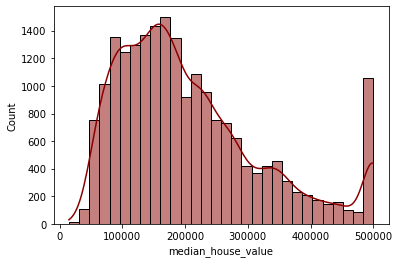

In [13]:
sns.histplot(cali_df['median_house_value'], kde=True, color='darkred', bins=30)

We observe the data is of a normalised shape except at the end where there is a huge set of houses beyond $500 grand. This makes the data positively skewed.

In [14]:
cali_df[cali_df['median_house_value']>=500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
89,-122.27,37.80,52,249,78.0,396,85,1.2434,NEAR BAY,500001
459,-122.25,37.87,52,609,236.0,1349,250,1.1696,NEAR BAY,500001
493,-122.24,37.86,52,1668,225.0,517,214,7.8521,NEAR BAY,500001
494,-122.24,37.85,52,3726,474.0,1366,496,9.3959,NEAR BAY,500001
509,-122.23,37.83,52,2990,379.0,947,361,7.8772,NEAR BAY,500001
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35,1503,263.0,576,216,5.1457,<1H OCEAN,500001
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,<1H OCEAN,500001
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,<1H OCEAN,500001
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,<1H OCEAN,500001


In [15]:
fig3=Figure(width=900,height=500)
m3=folium.Map(location=[35.631861,-119.569704],tiles='stamentoner',zoom_start=7)
fig3.add_child(m3)
HeatMap(zip(cali_df[cali_df['median_house_value']>=500000]['latitude'], cali_df[cali_df['median_house_value']>=500000]['longitude'])).add_to(m3)
m3


It is observed that the most expensive houses is present in the main cities of Los Angeles and San Francisco. This is because these are metropolitan cities with high quality of amenities and services offered that the cost of living becomes evidently very high.

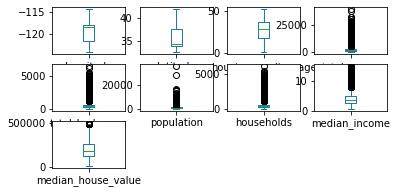

In [16]:
cali_df.plot(kind='box', subplots=True, \
             layout=(4,4), sharex=False, sharey=False)
plt.show()   #Displaying the boxplot of all the features in the dataset

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

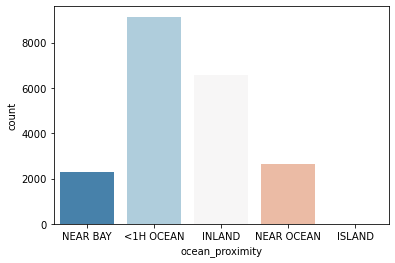

In [17]:
sns.countplot(x='ocean_proximity', data=cali_df, palette='RdBu_r')  # bar-chart in seaborn >> univariate plots

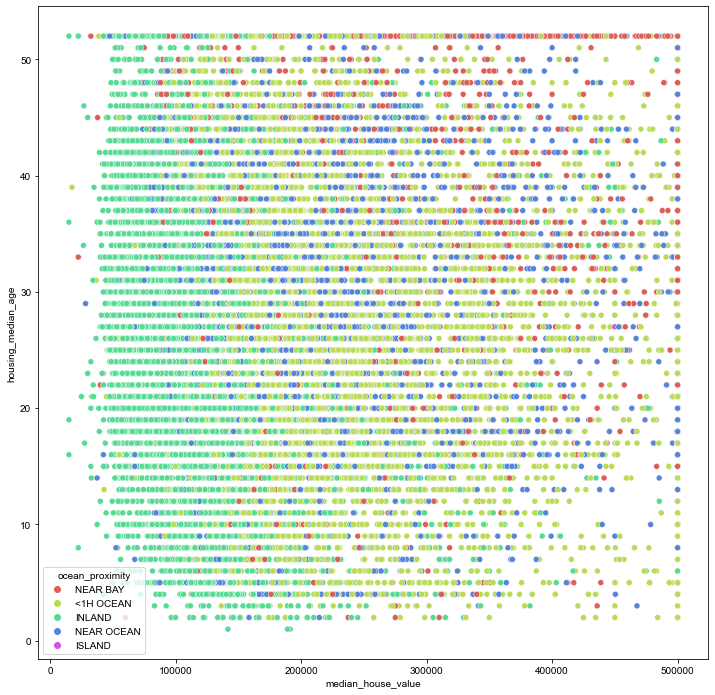

In [18]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = "median_house_value", y = "housing_median_age",data=cali_df, hue='ocean_proximity',palette='hls')
sns.set(style='whitegrid',)
plt.show()

<p>We can observe that most of the inland houses are cheaper than the remaining other categories of houses.This is mainly due to the fact that waterfront homes are desirable to many people, meaning there is great demand for them. Although there is lots of water in the United States, there is not a lot of land on waterfronts on which to build. So with waterfront property, the supply is low. High demand plus low supply equals high cost. San Francisco, also called the City by the Bay, is close to the water, which is one of the reasons property in San Francisco costs more. Because San Francisco sits on a peninsula and has limited space on which to build, the best way to add more housing is to build vertically. But city ordinances often restrict building height. In some zones, buildings can’t be higher than 40 feet. Residents of San Francisco have also passed referendums that limit building height so buildings won’t block the sun from shining on any public square or park. The demand is high in San Francisco, but ordinances often prevent more housing (more supply), and that keeps prices high.</p>

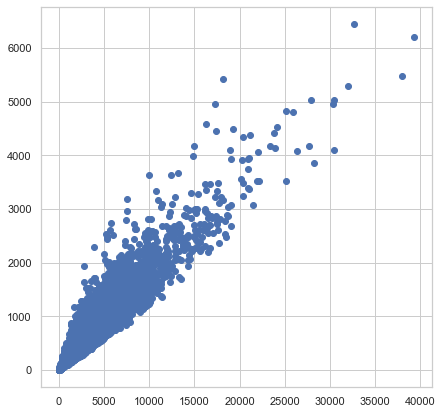

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(x = cali_df['total_rooms'],y=cali_df['total_bedrooms'])

It is safe to assume that every house will surely have bedrooms as the number of rooms and number of bedrooms are highly correlated.

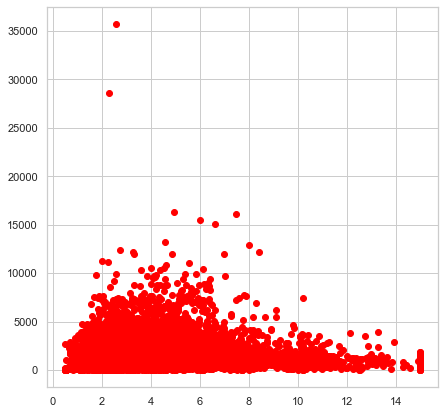

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(x = cali_df['median_income'],y=cali_df['population'],c = 'red')

In [21]:
# correlation
#set_option('precision', 2)
data_corr = cali_df.corr(method='pearson')
data_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [22]:
data_corr[(data_corr>0.5) | (data_corr < -0.5)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.924664,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,1.000000,0.930380,0.857126,0.918484,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.930380,1.000000,0.877747,0.979728,NaN,NaN
population,NaN,NaN,NaN,0.857126,0.877747,1.000000,0.907222,NaN,NaN
households,NaN,NaN,NaN,0.918484,0.979728,0.907222,1.000000,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.688075
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688075,1.000000


In [23]:
names = ['Long','Lat','House_age','n_rooms','n_bedrooms','pop','n_household','income','house_val']

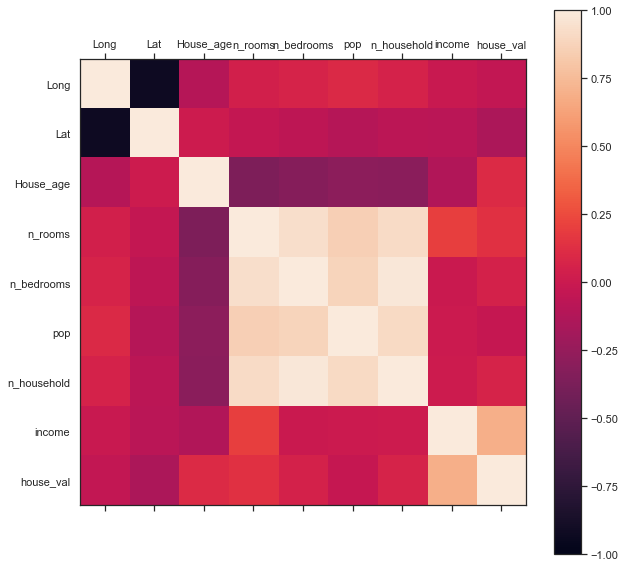

In [24]:
# correlation matrix
sns.set(style='white',)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cali_df.corr(), vmin=-1, 
                 vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

We can observe that the no of rooms, no of bedrooms, population and no of household are highly correlated with each other.

## <u>Data Preparation</u>
Now lets prepare and clean the data for missing values etc and get our data ready for modelling(encoding and splitting). Lets first deal with the missing values.

In [25]:
cali_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='total_bedrooms'>

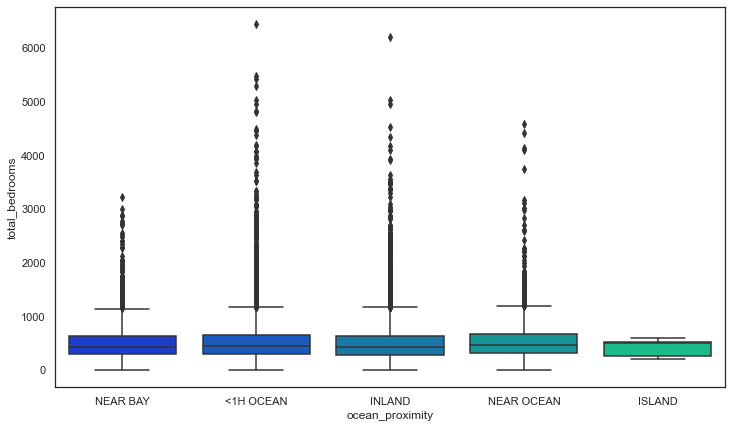

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='ocean_proximity',y='total_bedrooms',data=cali_df,palette='winter')

There are 207 missing values in total_bedroom. We can't draw any conclusions as to why there are missing values but we can safely assume that every house present surely does require a bedroom!! We can impute the missing values with the average number of bedrooms . But on the otherhand,we can smartly deal with the missing values by imputing the mean with respect to each ocean proximity level.

In [27]:
#Median total number of bedrooms for near bay homes
cali_df[cali_df['ocean_proximity']=='NEAR BAY']['total_bedrooms'].mean()

514.1828193832599

In [28]:
#Median total number of bedrooms for <1h ocean front homes
cali_df[cali_df['ocean_proximity']=='<1H OCEAN']['total_bedrooms'].mean()

546.5391852999778

In [29]:
#Median total number of bedrooms for inland homes
cali_df[cali_df['ocean_proximity']=='INLAND']['total_bedrooms'].mean()

533.8816194581281

In [30]:
#Median total number of bedrooms for near ocean homes
cali_df[cali_df['ocean_proximity']=='NEAR OCEAN']['total_bedrooms'].mean()

538.6156773211568

In [31]:
#Median total number of bedrooms for island homes
cali_df[cali_df['ocean_proximity']=='ISLAND']['total_bedrooms'].mean()

420.4

In [32]:
#Function to impute the missing values
def impute_no(col):
    Bed = col[0]
    Ocean = col[1]
    
    if pd.isnull(Bed):
        if Ocean == 'NEAR BAY':
            return 512.38
        elif Ocean == '<1H OCEAN':
            return 545.32
        elif Ocean == 'INLAND':
            return 532.95
        elif Ocean == 'NEAR OCEAN':
            return 537.77
        else:
            return 420.4
    else:
        return Bed

In [33]:
#Imputing the missing values
cali_df['total_bedrooms'] = cali_df[['total_bedrooms','ocean_proximity']].apply(impute_no,axis = 1)

In [34]:
cali_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

The missing values have been dealt with.Lets proceed to encode the categorical feature to use for model building

In [35]:
#instantiate the encoder
#ohe = OneHotEncoder(drop = 'first')

In [36]:
#Converting the categorical feature levels into dummy variables
#ohe_df = pd.DataFrame(ohe.fit_transform(cali_df[['ocean_proximity']]).toarray())
# merge with main df bridge_df on key values
#cali_df =cali_df.join(ohe_df)

In [37]:
#cali_df.head(400)

In [38]:
ocean = pd.get_dummies(cali_df['ocean_proximity'],drop_first = True)

In [39]:
cali_df = pd.concat([cali_df,ocean],axis = 1).drop('ocean_proximity',axis=1)
cali_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


The data is finally prepared and cleaned for modelling. Before proceeding further into the predicting procedure, lets first extract the X and y features from the dataset

In [40]:
#Extracting the X and y features
X = cali_df.drop('median_house_value',axis=1)   #X (dataframe) is the features of the dataset
y = cali_df['median_house_value']   #y (series) is the target of the dataset

In [41]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,1,0


In [42]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

## <u>Data Modelling</u>
Now that we have the data ready for machine learning and predictions, lets split the data into train and test so that can validate the model with the test set at a later stage.

In [43]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state = 5)

In [44]:
#Verifying the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 12), (4128, 12), (16512,), (4128,))

Lets standardize the data to ensure that all the features are on the same scale.

In [45]:
#Standardize the train and the test set
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)  #We only implement the transform function on the test set

After finishing the standardization of the features, we will now move onto the model building and predictions. For this project, we will be using only a linear regressor to predict the values.

In [46]:
#Instantiate the linear regressor and fit the train set on it
linreg = LinearRegression()
linreg.fit(X_train_std,y_train)

LinearRegression()

In [47]:
#Determine the score obtained from the given model
linreg.score(X_test_std,y_test)

0.6508110965536241

In [48]:
#Predict the values with the given model
y_pred = linreg.predict(X_test_std)
y_pred

array([165920.71836835, 210686.8083448 , 105584.93803811, ...,
       215812.24608662, 201508.62990045,  82305.96509582])

In [49]:
df_pred = pd.DataFrame(y_test.values, columns=['Y_test'])
df_pred['Prediction_all'] = y_pred

In [50]:
df_pred

,Y_test,Prediction_all
0,93600,165920.718368
1,153600,210686.808345
2,132500,105584.938038
3,147900,178363.890865
4,120700,184618.415924
...,...,...
4123,156300,143317.890234
4124,500001,259446.158176
4125,285300,215812.246087
4126,202500,201508.629900


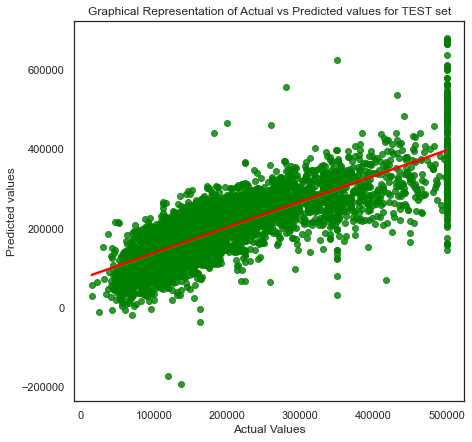

In [51]:
#Plot the actual vs the predicted values for the test set
plt.figure(figsize=(7,7))
sns.regplot(x=y_test,y=y_pred,scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set_style(style='white',)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Graphical Representation of Actual vs Predicted values for TEST set')
plt.show()

The graph is linear which is a good sign as the values plotted are almost near the test values.When we plot this on the train set:

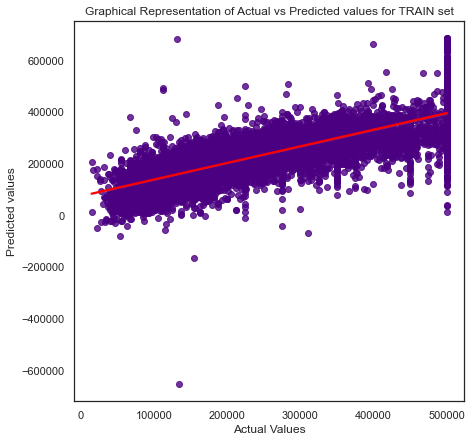

In [52]:
#Plot the actual vs the predicted values for the training set set
plt.figure(figsize=(7,7))
sns.regplot(x=y_train,y=linreg.predict(X_train_std),scatter_kws={"color": "indigo"}, line_kws={"color": "red"})
sns.set_style(style='white',)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Graphical Representation of Actual vs Predicted values for TRAIN set')
plt.show()

We can see that the model has accurately fitted the test data and has the same linear relationship.

In [53]:
#Root Mean squared error (RMSE) of the model
np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))

69409.67930838098

As we can observe from the R^2 score and the test plot, we can almost ascertain that the model is almost efficient in predicting the housing prices accurately.

### Bonus Exercise
Extract just the median_income column from the independent variables and train the model on just this feature to obtain predicted house prices. We follow the same procedure as what we had done previously.Since we have already standardised the data before, we will take extract the array from the ndarray standardized data which corresponds to median income i.e. 8th column.

In [54]:
#Due to zero indexing, it is the 7th index and we took transpose of the array for obtaining the column and then reshape into a row vector
Xb_train = X_train_std.transpose()[7].reshape(-1,1)
Xb_test = X_test_std.transpose()[7].reshape(-1,1)

In [55]:
linreg_b = LinearRegression() #Instantiating a new regressor

In [56]:
linreg_b.fit(Xb_train,y_train) #Fitting the model

LinearRegression()

In [57]:
linreg_b.score(Xb_test,y_test)

0.48490837623606464

In [58]:
yb_pred = linreg_b.predict(Xb_test)
yb_pred

array([159175.53535841, 195656.08374309, 133682.95317673, ...,
       165165.93758601, 170735.00929482, 130099.55797233])

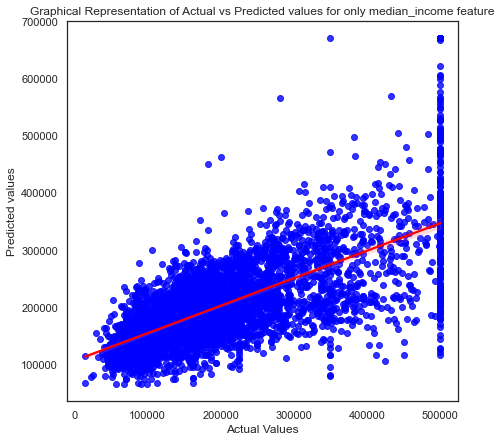

In [59]:
#Plot the actual vs the predicted values
plt.figure(figsize=(7,7))
sns.regplot(x=y_test,y=yb_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.set_style(style='white',)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Graphical Representation of Actual vs Predicted values for only median_income feature')
plt.show()

In [60]:
df_pred['Predction_incomeonly'] = yb_pred
df_pred

,Y_test,Prediction_all,Predction_incomeonly
0,93600,165920.718368,159175.535358
1,153600,210686.808345,195656.083743
2,132500,105584.938038,133682.953177
3,147900,178363.890865,155900.837762
4,120700,184618.415924,151758.449592
...,...,...,...
4123,156300,143317.890234,155341.844796
4124,500001,259446.158176,201133.380487
4125,285300,215812.246087,165165.937586
4126,202500,201508.629900,170735.009295


As seen from the plot and the score,the median_income feature predicted the price values almost accurately. This is due to high positive correlation between income and housing prices. This implies that if the income generated from every household incresaes, there is a high probability that the house prices will also increase.This is true as they receive more income, they are able to afford better houses with better quality of living.

## <u>Conclusion</u>

From this project, we have gained a deeper insight from the entire dataset and have drawn valuable conclusions. We conclude that:
- All island houses mentioned above in san california are luxurious places to stay with very high costs and mostly bought by celebrities.
- Metropolitan cities such as San Francisco and Los Angeles can mostly be afforded by wealthy people and hence can conclude that possibilites of casinoes and soap opera shows are hosted in these two cities.
- Most bachelors or individuals who recently gotten a job would prefer to buy houses which are inland. Hence upon this info we can proceed to build few breakfast cafe joints on the outskirts of the city so that more no. of job earners can pick up something to eat or drink on their from/to work.

<p>Finally we created a machine learning model to predict housing prices from all the features given and tested it on the test set to give a r^2 score of 0.65. We predicted the house prices and tested based on the income feature and found the required results. The above model can further be optimized through ensemble method techniques to give better accuracy. </p>

# ********************************THANK YOU*****************************